In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
print(__doc__)
import seaborn as sns
sns.set_context('poster')

Automatically created module for IPython interactive environment


In [3]:
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance

iris = load_iris(as_frame=True)

sampling_strategy={0: 10, 1: 20, 2: 47}

X, y = make_imbalance(iris.data, iris.target, sampling_strategy=sampling_strategy)

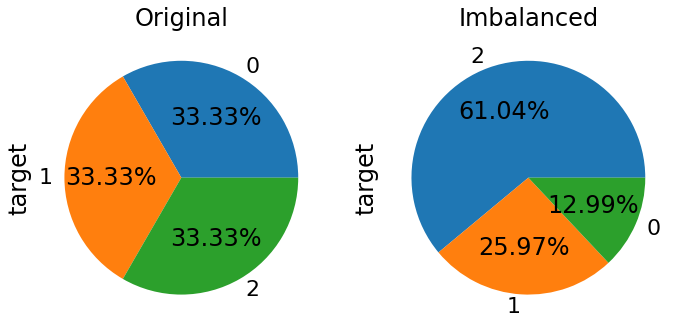

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
autopct = '%.2f%%'
iris.target.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title('Original')

y.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title('Imbalanced')
fig.tight_layout()

In [7]:
import numpy as np

binary_mask = np.bitwise_or(y == 0, y == 1)

binary_y = y[binary_mask]
binary_X = X[binary_mask]

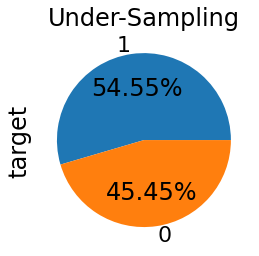

In [16]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(binary_X, binary_y)
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title('Under-Sampling')

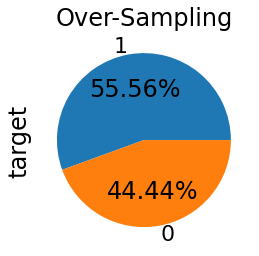

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_ros, y_ros = ros.fit_resample(binary_X, binary_y)

ax = y_ros.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title('Over-Sampling')

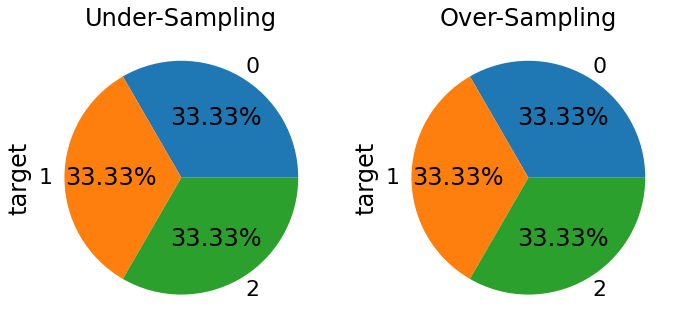

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

sampling_strategy='not minority'

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title('Under-Sampling')

sampling_strategy='not majority'

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title('Over-Sampling')

fig.tight_layout()